In [1]:
#IMPORT THE REQUIRED PACKAGE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READ THE DATA
data=pd.read_csv("C:/Users/monis/Documents/copper.csv")

C:\Users\monis\AppData\Local\Temp\ipykernel_22168\2416536777.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("C:/Users/monis/Documents/copper.csv")


1.DATA TYPE CONVERTION
2.IMPUTE OR REMOVE NULL VALUES
3.OUTLIER
4.SKEWNESS

In [3]:
#CHECK DATATYPES
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [4]:
#ITEM_DATE, QUANTITY_TONS, DELIVERY_DATE
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date


In [5]:
data.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [6]:
#CHECK NULL VALUES
data.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [7]:
#IMPUTE MATERIAL_REF 
data['material_ref'] = data['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

In [8]:
#AFTER IMPUTING CHECK FOR NULL VALUES AGAIN
data.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [9]:
#DROP ID AND MATERIAL_REF COLUMN
data.drop(columns=['id','material_ref'], inplace=True)

In [10]:
#IMPUTING MODE VALUES
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)

#IMPUTING MEDIAN VALUES
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

C:\Users\monis\AppData\Local\Temp\ipykernel_22168\3705053525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
C:\Users\monis\AppData\Local\Temp\ipykernel_22168\3705053525.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [11]:
data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [12]:
#ENSURE DATA HAS NO NULL VALUES
data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [13]:
data.shape

(181673, 12)

In [14]:
#BOX PLOT TO DETECT OUTLIERS, DISTRIBUTION PLOT TO SKEWNESS
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')


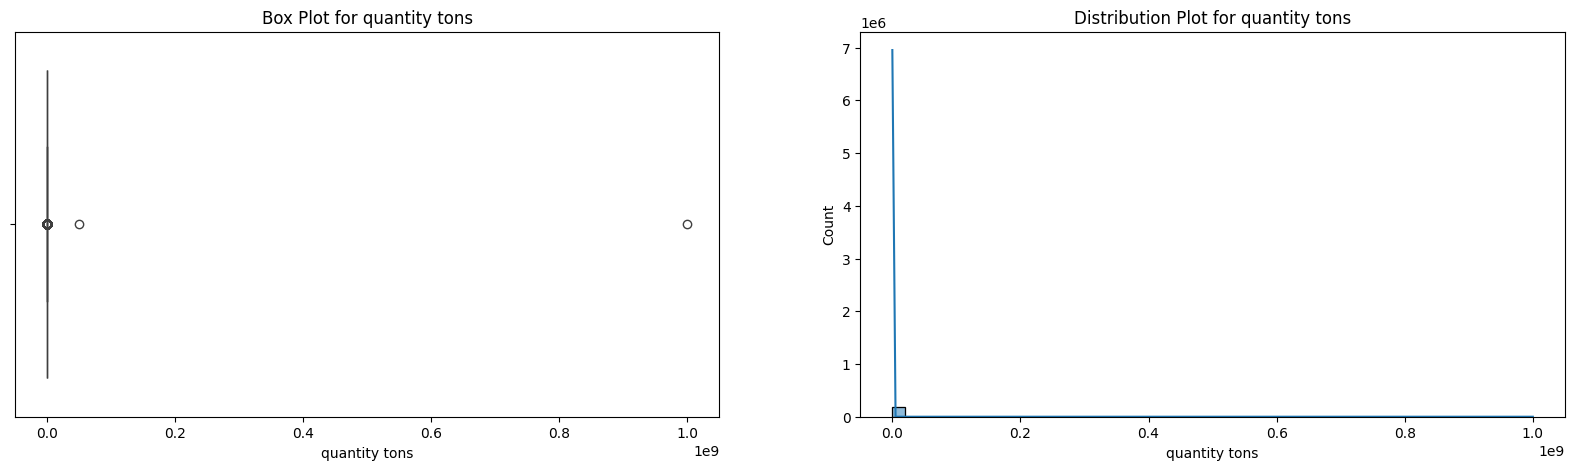

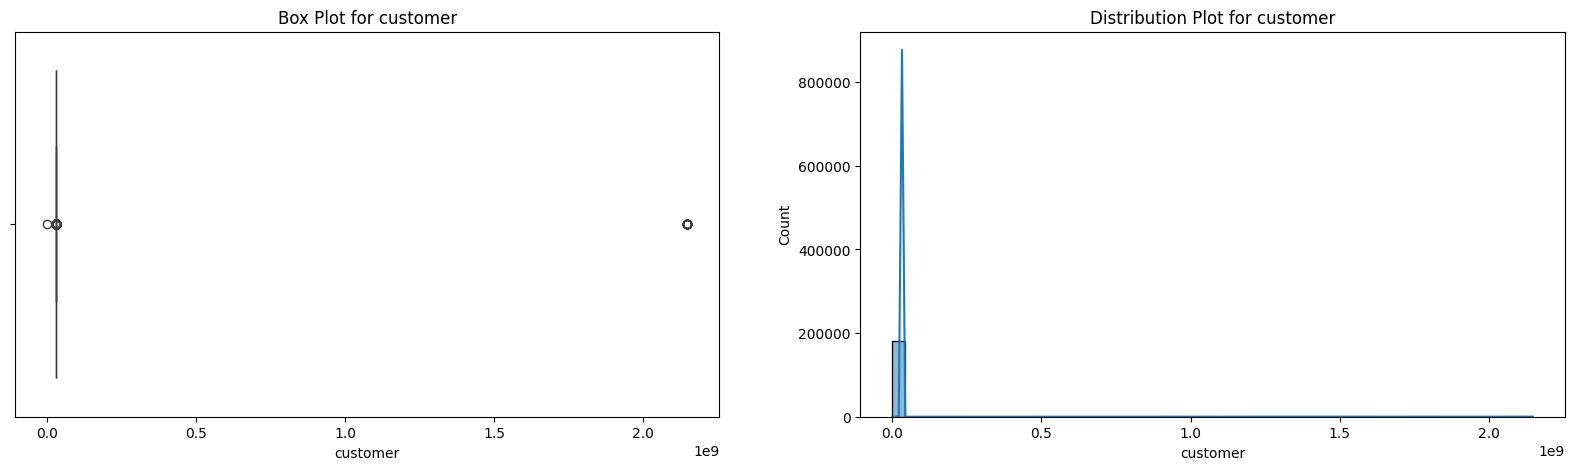

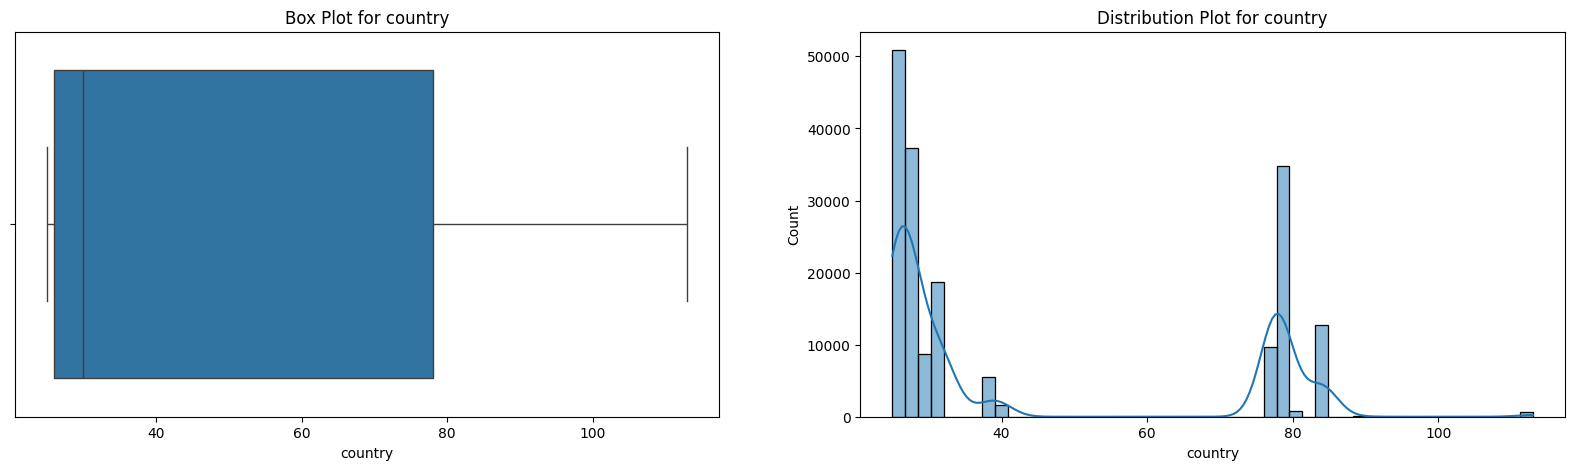

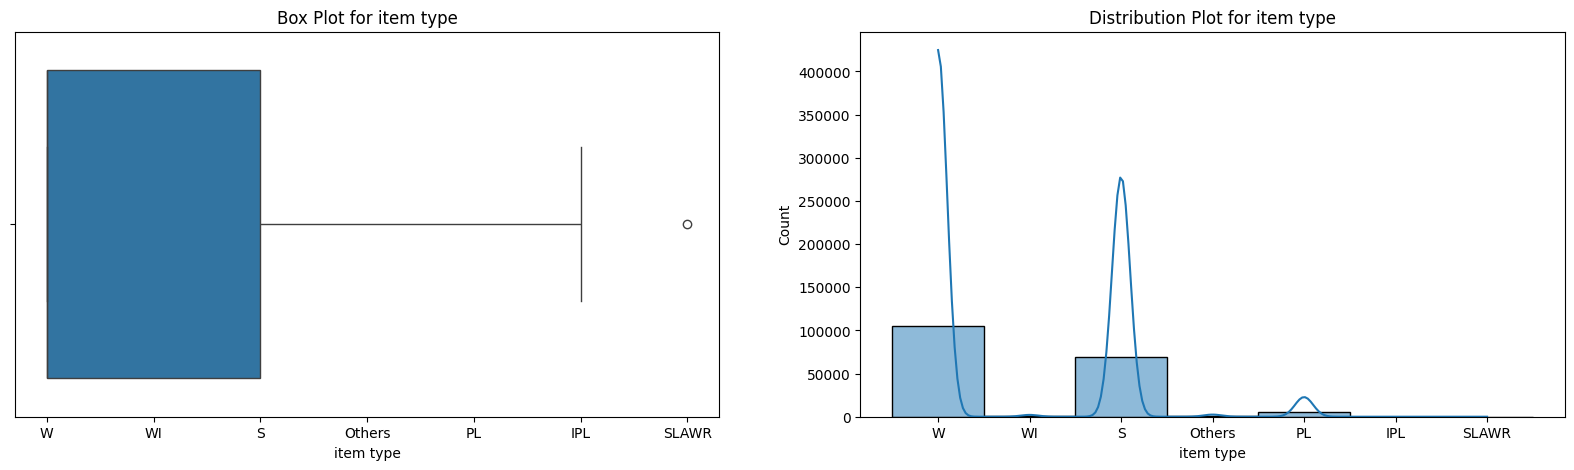

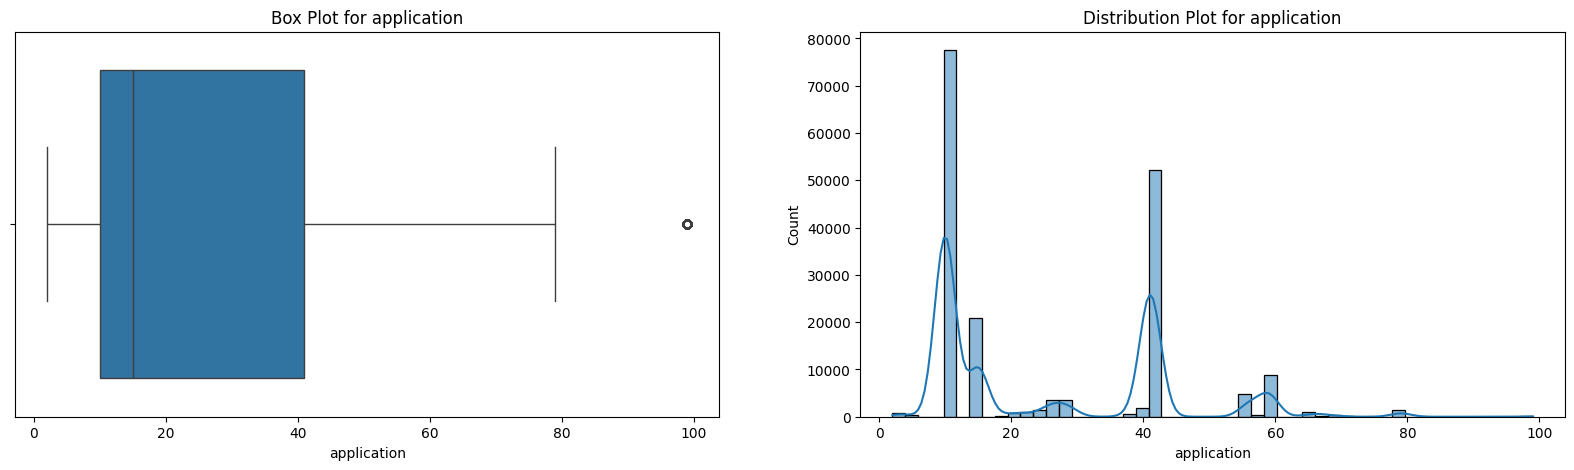

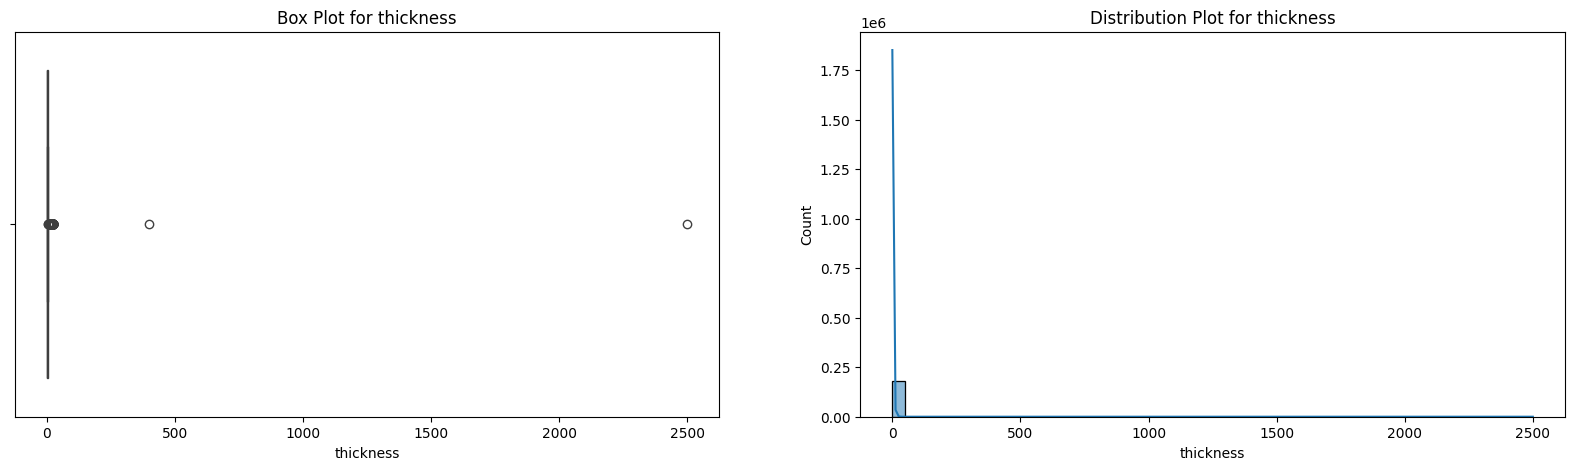

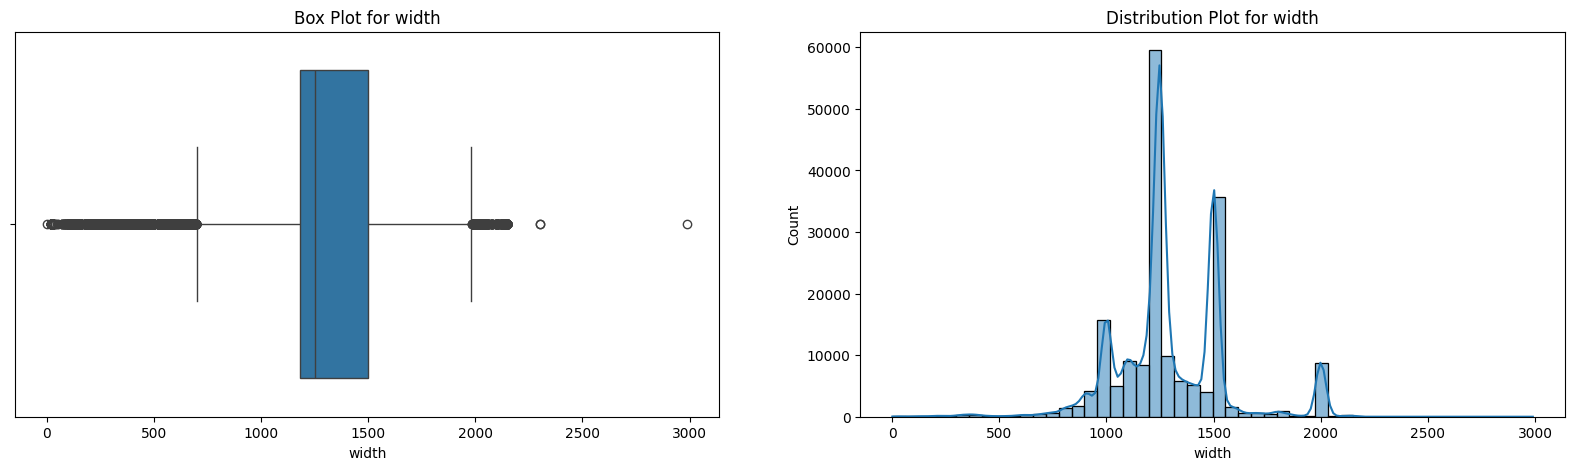

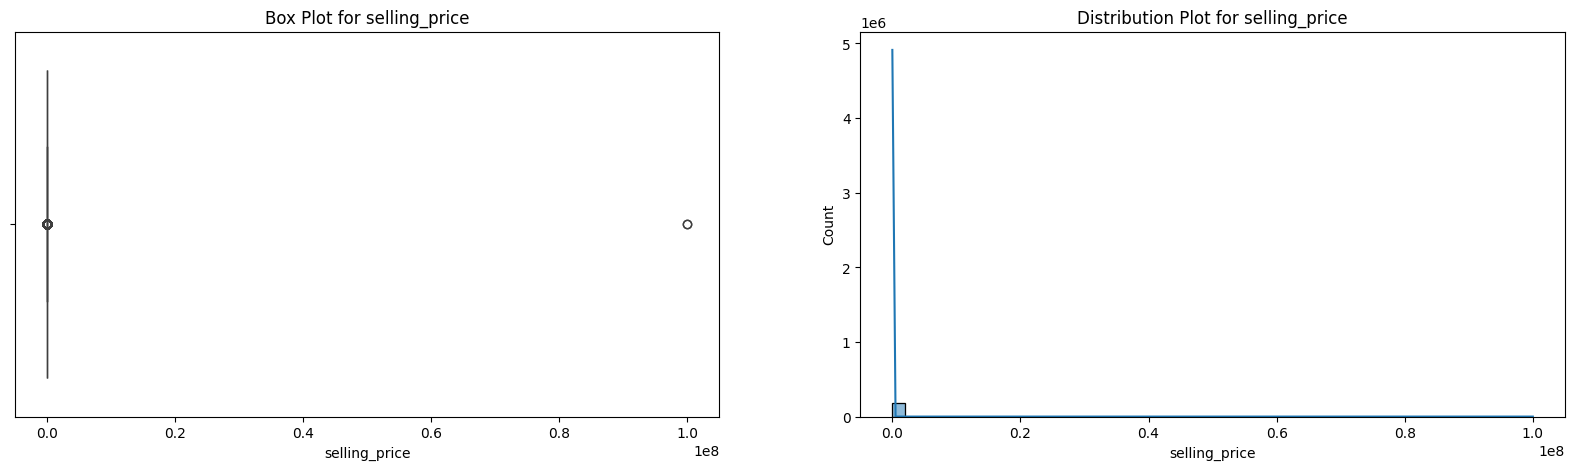

In [15]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(data, i)

In [16]:
#IQR METHOD TO CLIP OUTLIER
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    outliers_below = data[data[column] < lower_threshold].shape[0]
    outliers_above = data[data[column] > upper_threshold].shape[0]
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    print(lower_threshold,upper_threshold,outliers_below,outliers_above)

In [17]:
outlier(data,'quantity tons')
outlier(data,'customer')
outlier(data,'application')
outlier(data,'thickness')
outlier(data,'width')
outlier(data,'selling_price')


-73.31464257 151.44540103000003 1 20954
30071586.0 30405714.0 1 1630
-36.5 87.5 0 146
-2.75 6.449999999999999 0 13959
700.0 1980.0 1967 8981
243.0 1379.0 3151 1726


<function matplotlib.pyplot.show(close=None, block=None)>

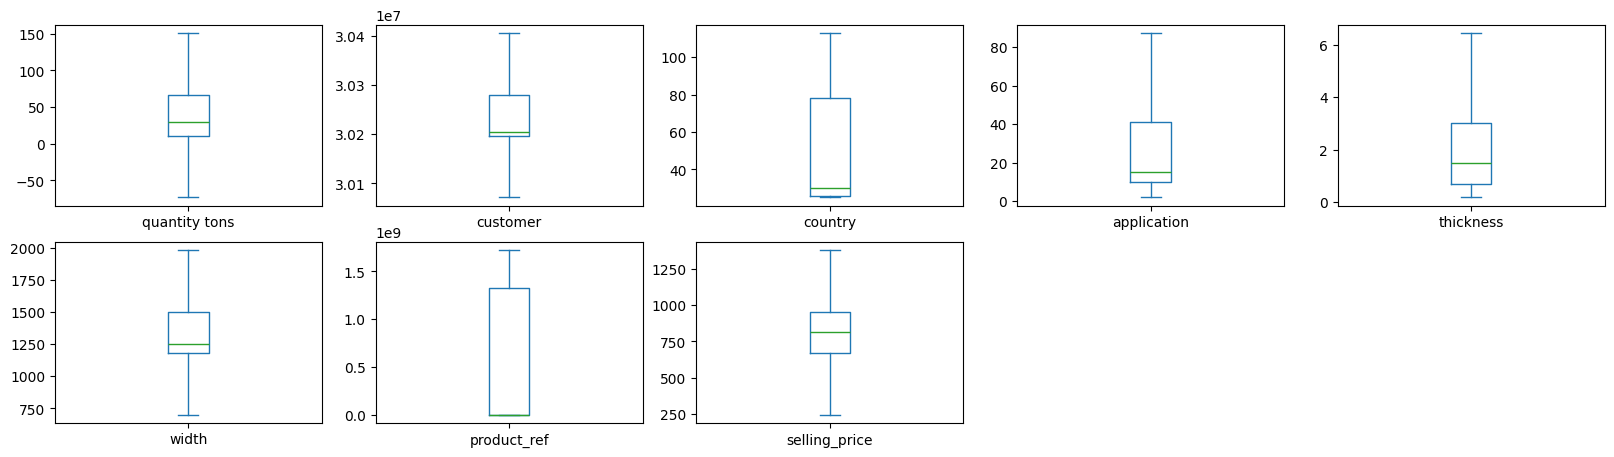

In [18]:
data.plot(kind='box',subplots=True,layout=(3,5),figsize=(20,8))
plt.show

In [19]:
#SKEWNESS IN DATA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

skewness = numerical_data.skew()

print("Skewness:")
print(skewness)


Skewness:
quantity tons    1.121664
customer         0.904630
country          0.753835
application      0.707604
thickness        1.060943
width            0.667659
product_ref      1.015216
selling_price    0.136549
dtype: float64


<Axes: >

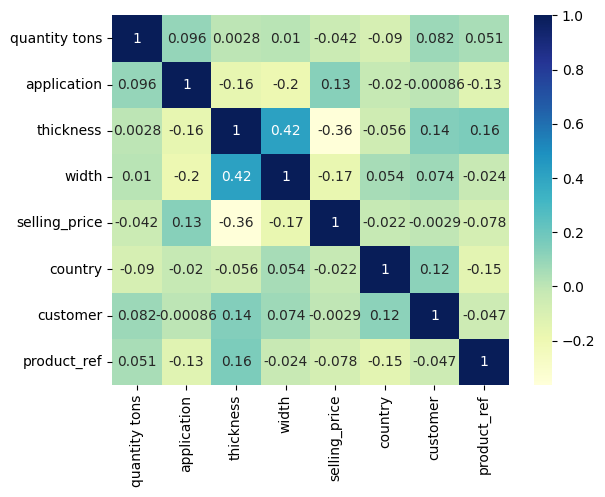

In [20]:
#HEAT MAP
x=data[['quantity tons','application','thickness','width','selling_price','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [21]:
data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [22]:
data.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [23]:
data.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [24]:
#MACHINE LEARNING TO PREDICT SELLING PRICE[REGRESSION]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [25]:
X=data[['quantity tons','status','item type','application','thickness','width','country','customer','product_ref']]
y=data['selling_price']

In [26]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()


In [27]:
X = np.concatenate((X[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

In [29]:
X[0]

array([5.41511386e+01, 1.00000000e+01, 2.00000000e+00, 1.50000000e+03,
       2.80000000e+01, 3.01563080e+07, 1.67079878e+09, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
X_train[0]

array([-0.92525972, -0.88074575, -0.1298071 ,  0.81520485,  1.35677246,
        1.44959751, -0.43180882, -0.01219183, -0.05804303, -0.17932294,
       -0.78471393, -0.00234615,  0.84861294, -0.05378333, -0.13261895,
       -0.48363022, -0.3474859 , -0.00741937, -0.01708268, -0.15525504,
       -0.15327283,  0.75231945, -0.00234615])

In [30]:
#MACHINE LEARNING MODELS
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [168]:
#INITIATE THE MACHINE LEARNING MODELS
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "AdaBoost": AdaBoostRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

In [169]:
#STORE MEAN_SQUARE_ERROR AND R2 SCORE IN RESULT TO FIND THE BEST MODEL
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = mse,r2

In [170]:
results

{'Linear Regression': (3.5834055659973054e+30, -8.231560116577332e+25),
 'Decision Tree': (20257.348617087995, 0.5346617069351567),
 'Random Forest': (12535.182025130205, 0.7120501642593686),
 'AdaBoost': (23770.978495782918, 0.4539489462911349),
 'Gradient Boosting': (20384.55772101343, 0.5317395442967038)}

In [32]:
dtr = DecisionTreeRegressor()

In [33]:
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [ 'sqrt', 'log2']}

In [34]:
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)


In [35]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [36]:
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [37]:

y_pred = best_model.predict(X_test)

In [39]:
z=[[-0.92525972, -0.88074575, -0.1298071 ,  0.81520485,  1.35677246,
        1.44959751, -0.43180882, -0.01219183, -0.05804303, -0.17932294,
       -0.78471393, -0.00234615,  0.84861294, -0.05378333, -0.13261895,
       -0.48363022, -0.3474859 , -0.00741937, -0.01708268, -0.15525504,
       -0.15327283,  0.75231945, -0.00234615]]

In [40]:
best_model.predict(z)

array([772.41830065])

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 16651.510071690518
R-squared: 0.6174926235323694


In [39]:
import pickle
with open('rmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('rscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('rit.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('rs.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

CLASSIFICATION  

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [32]:
data['status'] = data['status'].apply(lambda x: 'Lost' if x != 'Won' else x)

In [33]:
data['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [34]:
Y = data['status']
X= data[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]

In [35]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons', 'selling_price','application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
cscaler = StandardScaler()
X =cscaler.fit_transform(X)

In [36]:
from sklearn.preprocessing import LabelEncoder
be =LabelEncoder()
be.fit(Y) 
y = be.fit_transform(Y)

In [37]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
#TRAIN , TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#DECISION TREE
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8651988440897207


In [189]:
#LOGISTIC REGRESSION
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic = logistic_regression_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")

Logistic Regression Accuracy: 0.669574790147241


c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
# RANDOM FOREST
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8633548919774322


In [57]:
# ADABOOST
ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(X_train, y_train)
y_pred_ada = ada_boost_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada}")

c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.6552084766753818


In [58]:
#GRADIENT BOOSTING
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

Gradient Boosting Accuracy: 0.7255538736755195


In [52]:
# SAVING THE MODEL
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(cscaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [40]:
cz=[X[0]]

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(cz)

In [42]:
y_pred

array([1])

In [43]:
if y_pred==1:
    print("won")
else:
    print("loss")

won


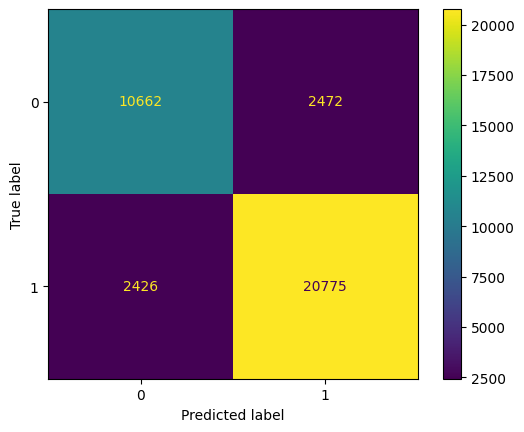

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     13134
           1       0.89      0.90      0.89     23201

    accuracy                           0.87     36335
   macro avg       0.85      0.85      0.85     36335
weighted avg       0.87      0.87      0.87     36335



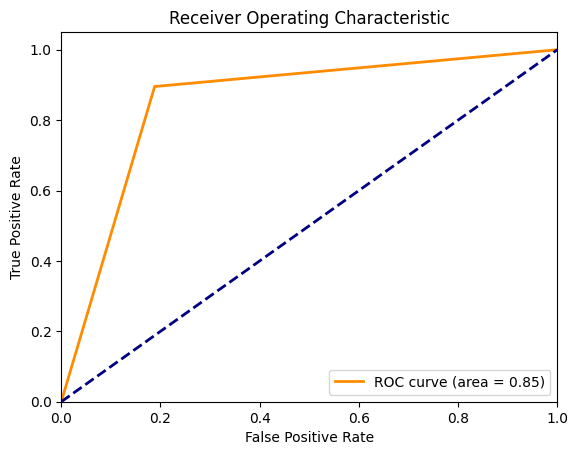

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()